In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **P2: Logistic Modeling **

Logistic regression, also called a logit model, is used to model dichotomous outcome variables.
In the logit model, the log odds of the outcome is modeled as a linear combination of the predictor
variables. Here we are going to use what we learned from the class to help a researcher build a
logistic regression model.
The researcher is interested in how variables, such as GRE (Graduate Record Exam scores),
GPA (grade point average) and prestige of the undergraduate institution, affect admission into
graduate school. The response variable, admit/don’t admit, is a binary variable. There are three
predictor variables: GRE, GPA scores and “rank”. We will treat the variables GRE and GPA as
continuous. The variable “rank” takes on the values 1 through 4. Institutions with a rank of 1 have
the highest prestige, while those with a rank of 4 have the lowest. Use all the three variables to
build a logistic model. Using the data “Graduate_School_Admission.csv” provided below:
• https://yuanxiongguo.github.io/teaching/Graduate_School_Admission.csv

# **Project tasks**

(i) Import the csv file into a Pandas DataFrame and perform Exploratory Data Analysis
(“EDA”) using “df.describe()”. Provide a brief interpretation of the output results.


In [9]:

# Load the data from the CSV file
url = 'https://yuanxiongguo.github.io/teaching/Graduate_School_Admission.csv'
df = pd.read_csv(url)

# Display summary statistics
summary_stats = df.describe()
summary_stats



,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


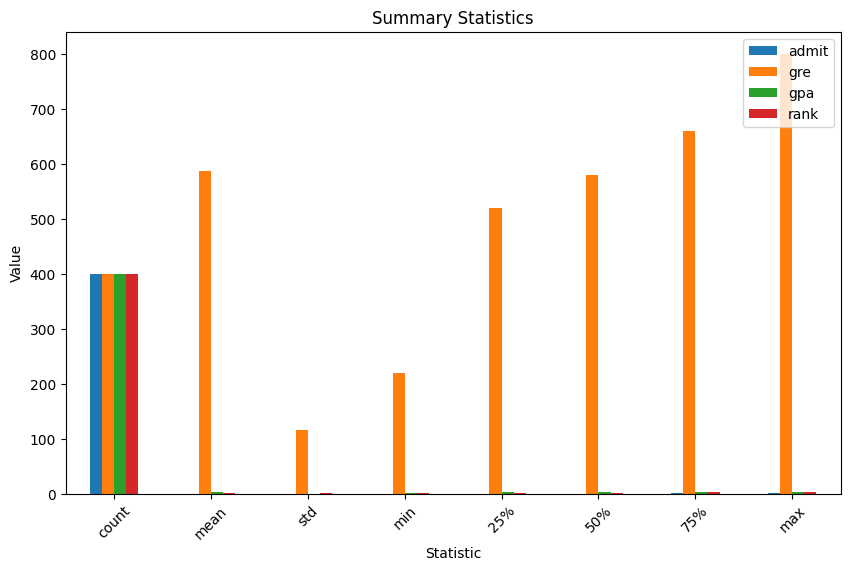

In [10]:
# Plot the summary statistics
summary_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.xlabel('Statistic')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

**Count:** Count indicates the number of non-null values in each column and helps in identiying the missing values.

Here in out model, there are 400.000000 values in each column.

**Mean:** It represent the average value of each numeric column.

Here in our model, the average score of:  

            - Admit is 0.317500

           -  GRE is 587.700000

           -  GPA is 3.389900

           -  Rank is 2.48500

**Standard deviation (std):** It measures the spread of values around the mean. When a deviation is higher it implies the chances of variablity in the data to be more.

Here in our model, std for
        
          - Admit is 0.466087, which shows the chances of variablity in our data is less.

          - GRE is 115.516536, which shows the chances of variablity in our data is more than it was in Admit.

          - GPA is 0.380567, this shows the chances of variablity in our data is lesser than Admit and GRE.

          - Rank is 0.94446, hence it shows the chances of variablity in our data is moderate than it was in Admit and GPA but not higher than GRE.

  GRE stands high in chances of having higher variablity in our data.

**Minimum and maximum:** It gives the smallest and largest values in each column in our model.

  Min values in each column in our model:

          - Admit has 0.000000

          - GRE has 220.000000

          - GPA has 2.260000

          - Rank has 1.00000

  Max values in each column in our model:

          - Admit has 1.000000
          - GRE has 800.000000
          - GPA has 4.000000
          - Rank has 4.00000

  25th, 50th, 75th percentiles are the values in data that represents the quartiles of the data. 50% splits the data in to two halves which has 50% falling above and other half falling below. Where as 25% and 75% indicates the respective fall in the data.

       - Admit:
       25% - 0.000000
       50% - 0.000000
       75% - 1.000000

       - GRE:
       25% - 520.000000
       50% - 580.000000
       75% - 660.000000

       - GPA:
       25% - 3.130000
       50% - 3.395000
       75% - 3.670000
       
       - Rank:
       25% - 2.00000
       50% - 2.00000
       75% - 3.00000
	            

(ii) Split the data into training data and testing data. (Splitting ratio is 4:1, in other word,
testing sample size is 20%. And for consistency of the model results, set “random_state = 0”).
Train a logistic regression model on the training data.

In [11]:

# Split the data into features (X) and target (y)
X = df.drop(columns=["admit"])
y = df["admit"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.72


(iii) Show/output confusion matrix and the accuracy score, precision score, recall score,
F1 score. (You should learn those statistical concepts by yourself.)

In [12]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[52  3]
 [19  6]]
Accuracy: 0.72
Precision: 0.67
Recall: 0.24
F1 Score: 0.35


(iv) Based on results from step (iii), provide your interpretation of how the model works
(student can either praise the model or criticize the model, and provide your rationale).

Confusion Matrix:

Confused matrix provides a detailed breakdown of correct and incorrect predictions.

It provides with:
      True positives (correctly predicted admissions)

      True Negatives (corrrectly predicted non-admissions)

      False positives (Incorrectly predicted admissions)

      False Negatives (Incorrectly predicted non-admissions)

Based on the confusion matrix above, overall our model is good at predicting who can be admitted vs not. Only 22 predictions were incorrect out of the total out of the 80 observations in the test data.

Accuracy:

our model's accuracy is approx- 72%, that means the predictions are correct almost 3/4 of the time which is higher than 0.5 (random). Therefore, the model works better than a random guess.

As accuracy is important to know the corrrect and incorrect records, however, in case of an imbalanced dataset it cannot be the only reliable metric to decide your final model. In this case our, target distribution is close to 32% (31.75%). Therefore, we can meaningfully interpret the accuracy score.

Precision:

Our model's precision is approx- 67%, that means it predicts the admission and it is likely to be correct 2 out of 3 times.
Here in this case, high precison is desirable when false positives affects the admission process (admitting unqualified students)

Recall (sensitivity):

High recall is important since false neagtives affects the quality of the admission process by Missing qualified students

The model recall is 24% which says that we are rejecting qualified students most of the time 3 out of 4 times which is not going to look good on the admission process. We could retrain the model to focus on the improving the recall rate whilst balancing the precision as well which means we need to check our F1 scores for the model too.

F1 Score:

F1 score helps in balancing the precision and the recall in the dataset.
Hence, a higher F1 score could indicate a better trade-off between precision and recall.

For this model, the F1 score is low and we miss out a lot on qualified students for the process of being more precise.
According to the output, our model predictions are stable in both train and test, however, logistic regression is not a relevant fit so I would suggest random forest estimator to get a better fit for the dataset model because we are missing a lot of qualified students.



(v) Use the learned model to make prediction on the testing data and output the
accuracy score.

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.72
